<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis
* iterator

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotnine as gg 
from plotnine import ggplot, aes 
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [7]:
raw = skd.load_breast_cancer()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.columns = [a.replace(' ', '_') for a in x.columns]
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [10]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
fit_lg = LogisticRegression().fit(x_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
pred_rf = fit_rf.predict(x_te)
prob_rf = fit_rf.predict_proba(x_te)[:,-1]
pred_lg = fit_lg.predict(x_te)
prob_lg = fit_lg.predict_proba(x_te)[:,-1]

In [13]:
accuracy_score(y_te, pred_lg), accuracy_score(y_te, pred_rf)

(0.9649122807017544, 0.9707602339181286)

In [14]:
fpr1, tpr1, thre1 = roc_curve(y_te, prob_lg)
fpr2, tpr2, thre2 = roc_curve(y_te, prob_rf)

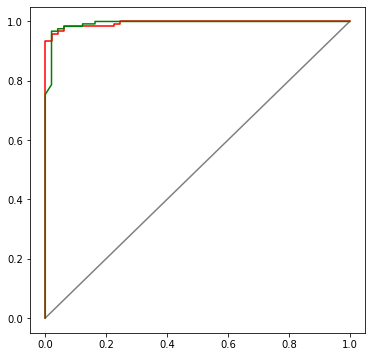

In [16]:
plt.figure(figsize = [6,6])
plt.plot([0,1], [0,1], color = 'grey')
plt.plot(fpr1, tpr1, color = 'red')
plt.plot(fpr2, tpr2, color = 'green')

# customer analysis

In [17]:
os.listdir()

['.config',
 'retail_data_response.csv',
 'retail_data_transactions.csv',
 '.Rhistory',
 'shops.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_train.csv',
 'items.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'sample_submission.csv',
 'listings.csv',
 'item_categories.csv',
 'rfm_test.csv',
 'test.csv',
 'sample_data']

In [33]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [34]:
df.columns = [a.lower() for a in df.columns]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [35]:
df = df[(~df.invoiceno.astype(str).str.contains('C')) & (df.country == 'United Kingdom')]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
df['date'] = pd.to_datetime(df['invoicedate'])
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df['unitprice'] * df['quantity']
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date,month,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34


In [37]:
df = df[['customerid', 'date', 'month', 'rev']].rename(columns = {'customerid':'id'})
df.head()

,id,date,month,rev
0,17850.0,2010-12-01,2010-12-01,15.30
1,17850.0,2010-12-01,2010-12-01,20.34
2,17850.0,2010-12-01,2010-12-01,22.00
3,17850.0,2010-12-01,2010-12-01,20.34
4,17850.0,2010-12-01,2010-12-01,20.34


In [39]:
df = df.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,12346.0,2011-01-18,2011-01-01,77183.60
1,12747.0,2010-12-05,2010-12-01,358.56
2,12747.0,2010-12-13,2010-12-01,347.71
3,12747.0,2011-01-20,2011-01-01,303.04
4,12747.0,2011-03-01,2011-03-01,310.78


In [41]:
df = df.sort_values(['id', 'date'], ascending = [1, 1])
df.head()

,id,date,month,rev
0,12346.0,2011-01-18,2011-01-01,77183.60
1,12747.0,2010-12-05,2010-12-01,358.56
2,12747.0,2010-12-13,2010-12-01,347.71
3,12747.0,2011-01-20,2011-01-01,303.04
4,12747.0,2011-03-01,2011-03-01,310.78


In [45]:
list_pu = df.groupby(['id', 'month']).first().reset_index()
list_pu.head()

,id,month,date,rev
0,12346.0,2011-01-01,2011-01-18,77183.60
1,12747.0,2010-12-01,2010-12-05,358.56
2,12747.0,2011-01-01,2011-01-20,303.04
3,12747.0,2011-03-01,2011-03-01,310.78
4,12747.0,2011-05-01,2011-05-05,442.96


In [47]:
list_npu = list_pu.groupby(['id']).first().reset_index()
list_npu.head()

,id,month,date,rev
0,12346.0,2011-01-01,2011-01-18,77183.60
1,12747.0,2010-12-01,2010-12-05,358.56
2,12748.0,2010-12-01,2010-12-01,4.95
3,12749.0,2011-05-01,2011-05-10,859.10
4,12820.0,2011-01-01,2011-01-17,170.46


In [58]:
list_mon = list_npu['month'].sort_values().unique()

In [67]:
for mon in list_mon : 
  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['id'].count().reset_index().rename(columns = {'id':'pu'})
  temp = temp.sort_values(['month'])
  temp = temp.assign(npu_month = mon,
                     mon = temp['month'].rank().astype(int),
                     ratio = temp['pu']/temp['pu'].max() * 100
                     )
  temp['npu_month'] = temp['npu_month'].astype(str)
  temp = temp.drop(['month'], axis = 1)
  temp = temp.reindex(['npu_month', 'mon', 'pu', 'ratio'], axis = 1)
  if mon == list_mon[0] :

    res = temp

  else : 

    res = pd.concat([res, temp], axis = 0)

res.head()

,npu_month,mon,pu,ratio
0,2010-12-01,1,815,100.000000
1,2010-12-01,2,289,35.460123
2,2010-12-01,3,263,32.269939
3,2010-12-01,4,304,37.300613
4,2010-12-01,5,293,35.950920


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


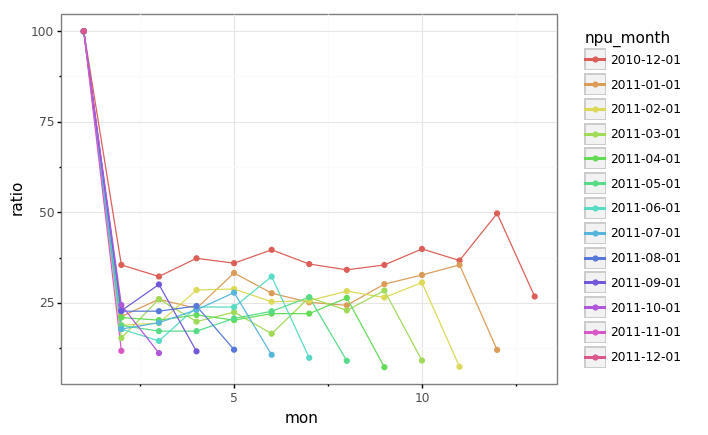

<ggplot: (8735632360521)>

In [68]:
(
    ggplot(res, aes('mon', 'ratio', color = 'npu_month')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

# iterators

In [69]:
mat = [list('ABC'), list('DEF'), list('GHI')]
mat

[['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']]

In [74]:
for r, row in enumerate(mat) :
  for c, letters in enumerate(row) :
    print(f'({r}, {c}) : {letters}')

(0, 0) : A
(0, 1) : B
(0, 2) : C
(1, 0) : D
(1, 1) : E
(1, 2) : F
(2, 0) : G
(2, 1) : H
(2, 2) : I


In [75]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'age': 73,
  'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M'},
 {'age': 29,
  'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F'},
 {'age': 51,
  'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M'},
 {'age': 32,
  'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F'},
 {'age': 42, 'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F'}]

In [76]:
from functools import reduce

In [78]:
reduce(lambda acc, cur : acc + cur['age'], users, 0)

227

In [79]:
reduce(lambda acc, cur : acc + [cur['mail']], users, [])

['gregorythomas@gmail.com',
 'hintoncynthia@hotmail.com',
 'wwagner@gmail.com',
 'daniel79@gmail.com',
 'ujackson@gmail.com']